<a href="https://colab.research.google.com/github/hasaninevitable/CODSOFT/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the path to the dataset
data = pd.read_csv('/content/drive/My Drive/dataset/advertising.csv')
# Display the first few rows
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Exploratory Data Analysis (EDA)
**Visualizations**

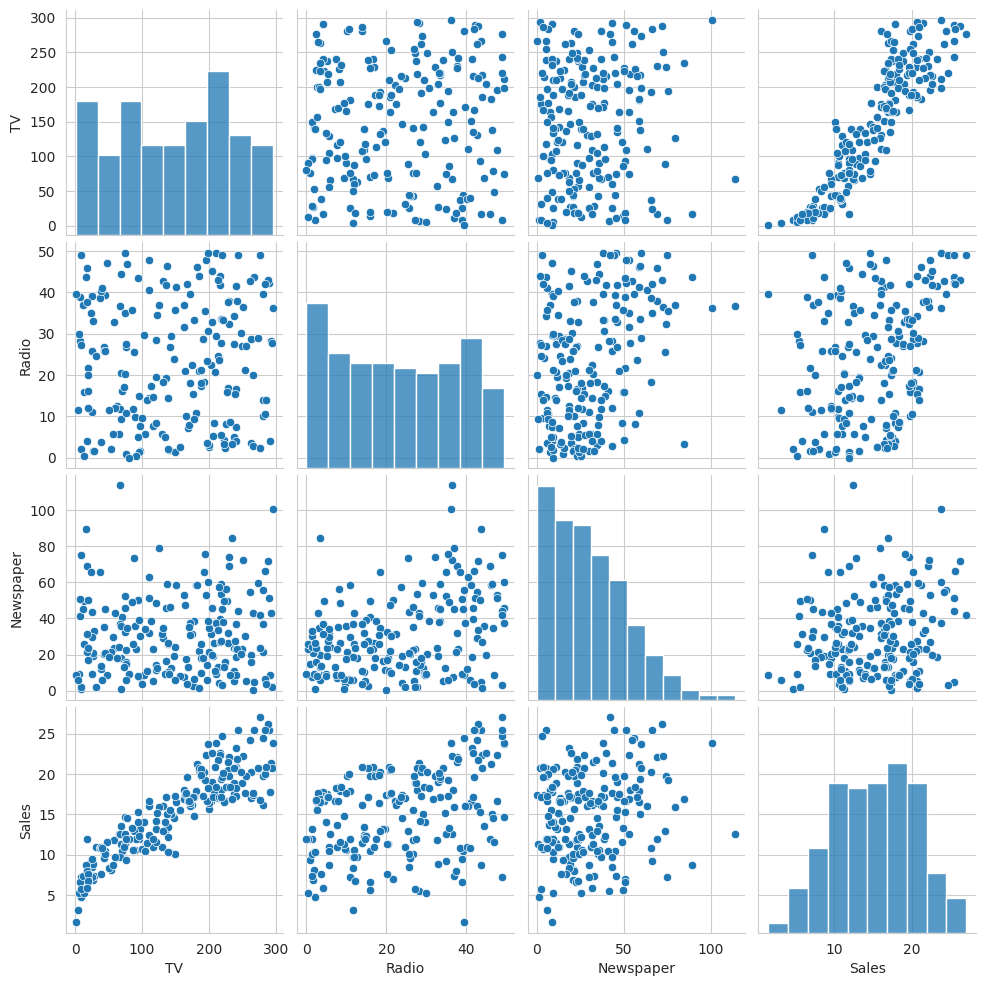

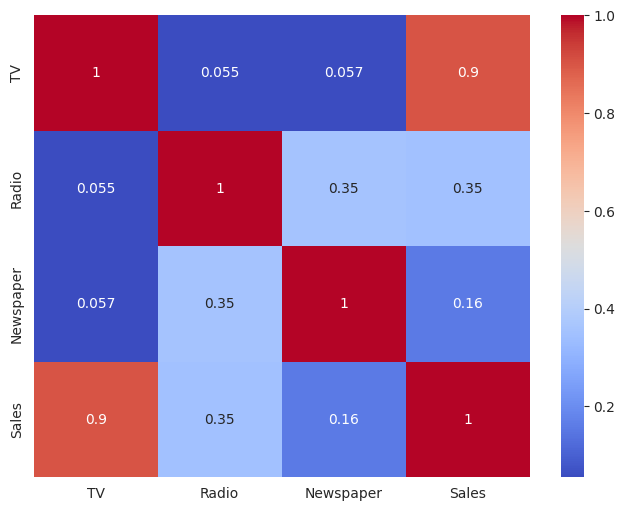

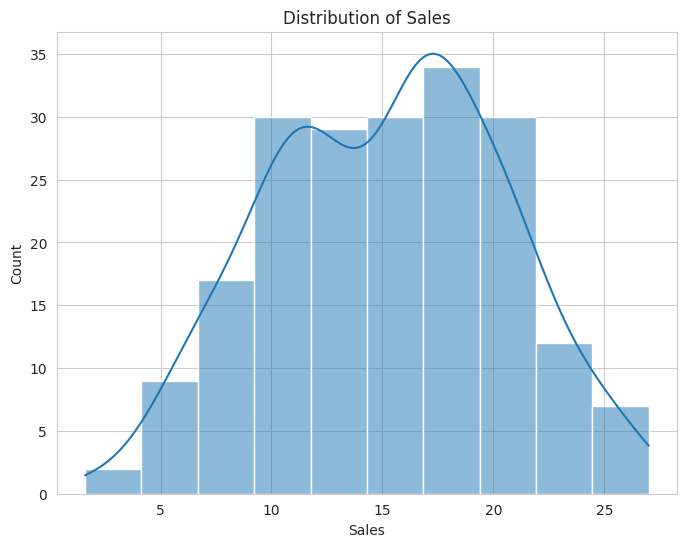

In [5]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

# Heatmap to visualize correlation between variables
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of the target variable 'Sales'
plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()


 Data **Preprocessing**

In [6]:
# Check for missing values
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


**Train-Test Split**

In [7]:
# Define features and target variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model **Building**

In [8]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

Model **Evaluation**

Mean Squared Error: 2.9077569102710896
R^2 Score: 0.9059011844150826


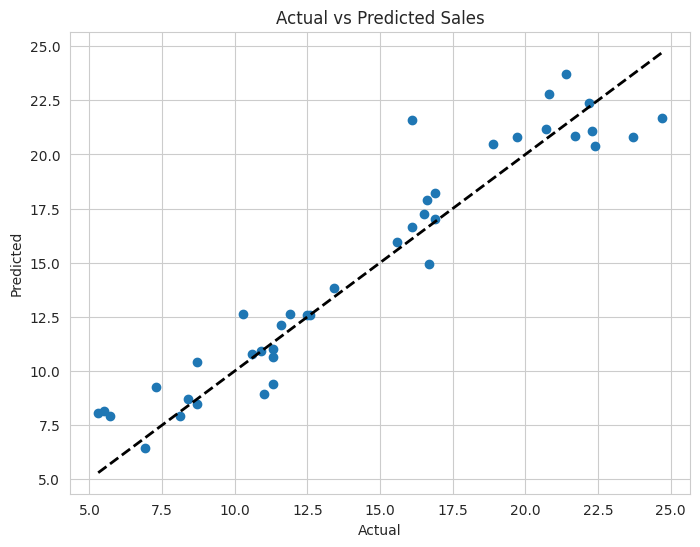

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.show()


checking with different model to evaluate best performance

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Cross-validation with Linear Regression
lr_cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f'Linear Regression CV R^2 scores: {lr_cv_scores}')
print(f'Mean CV R^2 score for Linear Regression: {np.mean(lr_cv_scores)}')

# Trying Ridge Regression
ridge_model = Ridge()
ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=10, scoring='r2')
print(f'Ridge Regression CV R^2 scores: {ridge_cv_scores}')
print(f'Mean CV R^2 score for Ridge Regression: {np.mean(ridge_cv_scores)}')


Linear Regression CV R^2 scores: [0.89391193 0.84835255 0.91336339 0.93740449 0.90972209 0.92995146
 0.85494586 0.83727721 0.86267846 0.927566  ]
Mean CV R^2 score for Linear Regression: 0.8915173447734139
Ridge Regression CV R^2 scores: [0.89391376 0.84835241 0.91336234 0.93740494 0.9097222  0.92995247
 0.85494755 0.8372747  0.86267818 0.92756556]
Mean CV R^2 score for Ridge Regression: 0.891517411880829
